# Simple graphics

This notebook goes through different basic graphs that can be used in data analysis with practical applications. We will focus on the code to generate them and some little tricks to achieve more readable graphics.

It is important to remember that although this notebook uses data to exemplify graphs, the opposite is true in the actual application of data science. We must first think about the question to be answered and then design the visualization. This includes:

* Find the right graph for the data
* Group the data to highlight a pattern that helps answer the initial question.
* Find the most effective visual encodings to communicate this pattern (although we won't talk about that much in this notebook).

In [2]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn

seaborn.set_context('talk')

In [3]:
url = 'https://www.famaf.unc.edu.ar/~nocampo043/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [4]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

In [5]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_GROSS,salary_monthly_NET,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies
0,Female,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,University,Ongoing,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Yes, they were paid by my employer",No,Yes,Consultant,None,None,None,None,None,None,GNU/Linux,Android,No,0.0,Gross,Full-Time,53000.0,43000.0,NaN,1,1,No,No,0.0,0,In my current job,NaN,501-1000,Services / Software Consulting / Digital,7,2
1,Male,29,Argentina,Corrientes,5.0,2.0,2.0,4,University,Ongoing,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Yes, they were paid by myself, Yes, they were ...",No,Yes,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",None,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Gross,Full-Time,79000.0,63000.0,NaN,2,2,Less than a salary,One,10.0,1,Never,No,201-500,Other industries,8,9
2,Female,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secondary,Complete,NaN,NaN,"Yes, they were paid by myself, Yes, they were ...",No,Yes,Infosec,"Linux, VMWare",None,None,None,None,None,Windows,iOS,No,0.0,Percentage of my salary,Full-Time,160000.0,127000.0,NaN,3,3,One salary,No,0.0,0,In a previous job,No,2001-5000,Other industries,6,9


## Tables

Like all the ones we've been using so far, tables are often left out of visualizations. However, they are one of the most powerful forms of representation. We usually start from a table to generate more complex visualizations, but this does not mean that generating good tables is not helpful in the communication process.

* Show exact amounts
* Represent any type of data
* They are universally accessible
* They are easy to create
* Allow comparing many variables

Pandas also allows us other simple operations of descriptive statistics. In the next cell, we are describing the distribution of the net salary column, for different levels of studies.

In [6]:
df_studies_level_median = df[['profile_studies_level', "salary_monthly_NET"]].groupby('profile_studies_level').median()
df_studies_level_median

,salary_monthly_NET
profile_studies_level,
Doctorate,88900.0
Postdoc,266250.0
Postgraduate,100000.0
Primary,87500.0
Secondary,65000.0
Terciary,68000.0
University,80000.0


In [7]:
column_names = ['profile_studies_level', "salary_monthly_NET"]
fig = go.Figure(
    data=[go.Table(
        header=dict(values=column_names),
        cells=dict(values=[df_studies_level_median.reset_index()["profile_studies_level"],
                           df_studies_level_median.reset_index()["salary_monthly_NET"]]
                   ))
    ])
fig.show()

## Bar/Column charts

* x-axis: categorical variable
* y-axis: numeric variable
(It can be done "lying down" also reversing the order)

They compare numerical quantities between categorical variables. They are one of the most faithful and easy to perceive encodings. That is, we can read the quantities represented more accurately than in other types of graphs.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

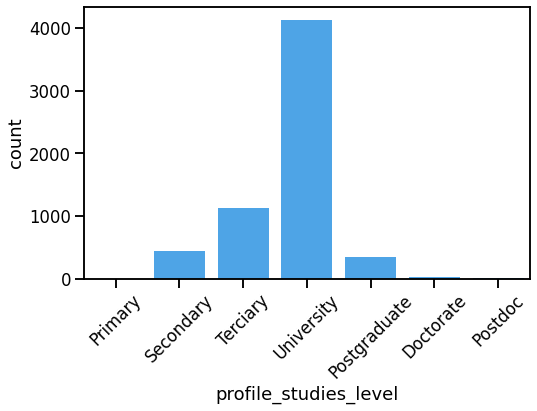

In [8]:
sorted_studies_levels = ["Primary", "Secondary", "Terciary", "University", "Postgraduate", "Doctorate", "Postdoc"]
fig = plt.figure(figsize=(8,5))
seaborn.countplot(data=df, x='profile_studies_level',
                  color=BLUE, order=sorted_studies_levels)
plt.xticks(rotation=45)

In [9]:
df_studies_level_count = (
    df["profile_studies_level"]
      .value_counts()
      .reset_index()
      .rename(columns={"index": "profile_studies_level",
                       "profile_studies_level": "count"})
)
df_studies_level_count

,profile_studies_level,count
0,University,4133
1,Terciary,1135
2,Secondary,449
3,Postgraduate,342
4,Doctorate,30
5,Postdoc,4
6,Primary,2


In [10]:
fig = px.bar(df_studies_level_count, x='profile_studies_level', y='count', category_orders=dict(profile_studies_level=sorted_studies_levels))
fig.show()

They are very versatile graphics, but they are not always suitable. The more bars are plotted, the less attention is paid to variation from one bar to another, and the more apparent the overall distribution. Bar charts are also very sensitive to ordering, since the farther apart the bars are, the more difficult it is to compare them. On the other hand, the difference in the size of each bar may encode only a certain amount of information. For example, if the bars are large in height, a small difference between them will go unnoticed, while if the bars are small, the same difference will be more noticeable.

Bar charts are best suited for viewing categorical variables, such as educational level. On the y-axis we must put a numeric variable. In this case, we are going to use the v.a. *average net salary*. For that, we can very easily pass `seaborn` a function to calculate on the salary column using the `estimator` parameter.

Note: The value of the `estimator` defaults to the mean, but now we make it explicit. We could have selected another function, like `numpy.median`, or defined a new one.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

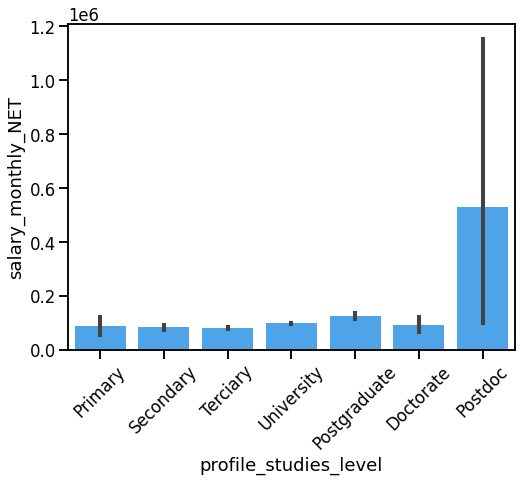

In [11]:
fig = plt.figure(figsize=(8,6))
seaborn.barplot(data=df,
                y="salary_monthly_NET", x='profile_studies_level',
                estimator=numpy.mean, ci=95,
                color=BLUE, order=sorted_studies_levels)
plt.xticks(rotation=45)

In [13]:
df_studies_level_mean = (
    df[["profile_studies_level", "salary_monthly_NET"]]
      .groupby("profile_studies_level")
      .mean()
      .reset_index()
      .rename(columns={"salary_monthly_NET": "salary_monthly_NET_mean"})
)
df_studies_level_mean

,profile_studies_level,salary_monthly_NET_mean
0,Doctorate,91629.115517
1,Postdoc,529875.000000
2,Postgraduate,124166.795300
3,Primary,87500.000000
4,Secondary,82686.351857
5,Terciary,80814.433784
6,University,97410.224414


In [14]:
fig = px.bar(df_studies_level_mean, x='profile_studies_level', y='salary_monthly_NET_mean', category_orders=dict(profile_studies_level=sorted_studies_levels))
fig.show()

In this graph we are using the height of the bars to represent the average of the salary estimates for each of the groups. However, this is not obvious at first glance. The user does not have enough information to infer the meaning of the vertical axis. Keep in mind that many times, the original name of the column does not represent the added information, and we have to change them.

Also, what do the black lines mean? They are the confidence intervals, which have a default value of 95. It indicates that the true population value of the statistic is in that range, with a confidence of 95%. So we see that (probably) for Doctorate and Postdoc, the range is much smaller since the sample is much larger. For other minority groups, we are uncertain of the true value of the population mean because the sample is too small.

This statistic is often difficult to interpret for non-statisticians, and it may be convenient to replace it with the sample standard deviation. Although we use the same visual encoding (the black lines), the values ​​we represent are completely different. If we use a confidence interval, we are talking about the distribution of the estimator of the population mean, which is a random variable that takes values ​​in all possible samples. On the other hand, if we use the standard deviation, we are talking about the value of the statistic in this sample. You can explore both values, but for this case, neither provides useful information for analysis.

Lastly, and as we saw in class, some categories have too few values ​​to be useful. Therefore, we are going to group them.

With those observations, we can build a more representative graph.

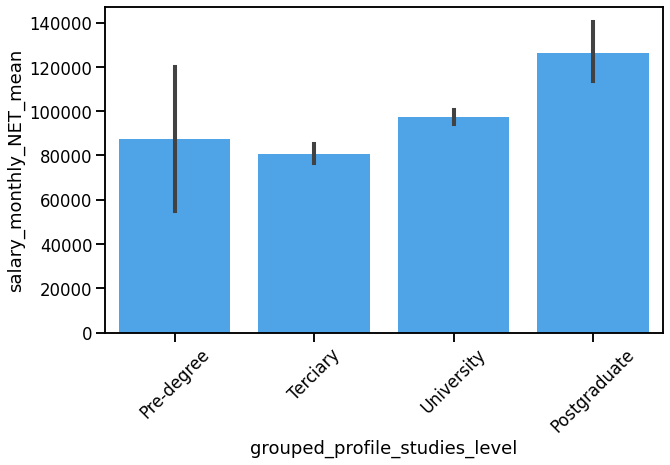

In [15]:
new_groups = {
    'Postdoc': 'Postgraduate',
    'Doctorate': 'Postgraduate',
    'Primary': 'Pre-degree',
    'Secundary': 'Pre-degree'
}
order = ['Pre-degree', 'Terciary', 'University', 'Postgraduate']
grouped_studies_level = df.profile_studies_level.replace(new_groups)
fig = plt.figure(figsize=(10, 6))
seaborn.barplot(y=df["salary_monthly_NET"], x=grouped_studies_level,
                estimator=numpy.mean, ci=95,
                color=BLUE, order=order
                )
plt.xticks(rotation=45)
plt.ylabel("salary_monthly_NET_mean")
plt.xlabel("grouped_profile_studies_level")
plt.ticklabel_format(style='plain', axis='y')

### Comparing categorical variables

We can use the `hue` parameter when we want to compare different groups. This is equivalent to adding another v.a. to the graph, which must be categorical.

In [16]:
df.profile_studies_level_state.unique()

array(['Ongoing', 'Complete', 'Incomplete'], dtype=object)

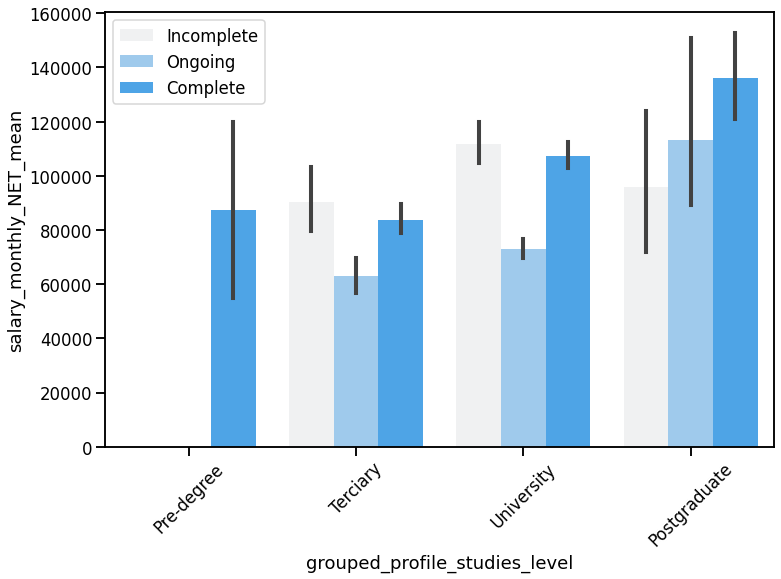

In [17]:
hue_order = ['Incomplete', 'Ongoing', 'Complete']
fig = plt.figure(figsize=(12,8))
seaborn.barplot(y=df["salary_monthly_NET"], x=grouped_studies_level,
                hue=df.profile_studies_level_state,
                estimator=numpy.mean, ci=95,
                color=BLUE, order=order, hue_order=hue_order)
plt.xticks(rotation=45)
plt.ylabel("salary_monthly_NET_mean")
plt.xlabel("grouped_profile_studies_level")
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='upper left')

In [19]:
df["grouped_profile_studies_level"] = grouped_studies_level

In [20]:
df_grouped_studies_level_mean = (
    df[["grouped_profile_studies_level", "profile_studies_level_state", "salary_monthly_NET"]]
      .groupby(["grouped_profile_studies_level", "profile_studies_level_state"])
      .mean()
      .reset_index()
      .rename(columns={"salary_monthly_NET": "salary_monthly_NET_mean"})
)
df_grouped_studies_level_mean

,grouped_profile_studies_level,profile_studies_level_state,salary_monthly_NET_mean
0,Postgraduate,Complete,136195.226486
1,Postgraduate,Incomplete,95980.705882
2,Postgraduate,Ongoing,113180.150851
3,Pre-degree,Complete,87500.000000
4,Secondary,Complete,84306.140665
5,Secondary,Incomplete,79562.904760
6,Secondary,Ongoing,41958.272727
7,Terciary,Complete,83642.760627
8,Terciary,Incomplete,90414.355140
9,Terciary,Ongoing,62852.213493


In [21]:
fig = px.bar(df_grouped_studies_level_mean,
             x='grouped_profile_studies_level',
             y='salary_monthly_NET_mean',
             color='profile_studies_level_state',
             barmode='group',
             category_orders=dict(grouped_profile_studies_level=order))
fig.show()

## Line charts

* y-axis: numeric variable
* x-axis: continuous numeric variable

It is effective for comparing *numerical quantities*. If we compare it with a bar chart, they have advantages and disadvantages. First, it suggests a stronger relationship between the data on the horizontal axis, which must be sequential. In addition to this, they can represent more values since the visual weight of each point is much less than a bar.

On the other hand, a line chart with a few points may be indicative of a trend that doesn't exist (or that we don't have enough data to show it).

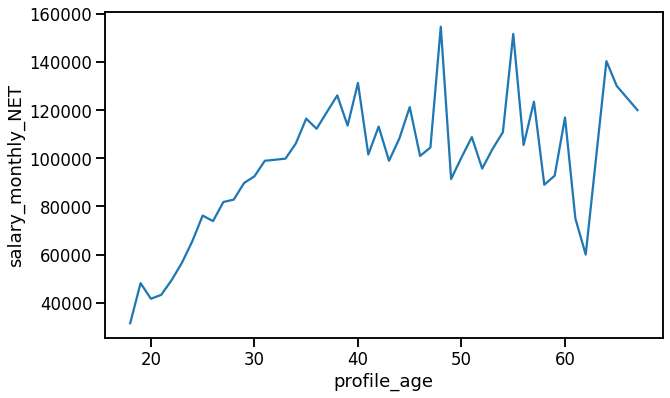

In [22]:
plt.figure(figsize=(10,6))
max_age = 100
seaborn.lineplot(data=df[df.profile_age < max_age],
                 x='profile_age', y="salary_monthly_NET",
                 estimator='mean', ci=None)

In [23]:
df_profile_age_mean = (
    df[["profile_age", "salary_monthly_NET"]]
        .loc[df.profile_age < max_age, :]
        .groupby("profile_age")
        .mean()
        .reset_index()
        .rename(columns={"salary_monthly_NET": "salary_monthly_NET_mean"})
)

In [24]:
px.line(df_profile_age_mean, x='profile_age', y="salary_monthly_NET_mean")

We can also use the confidence interval in lineplots to indicate which parts are less reliable due to the number of samples.

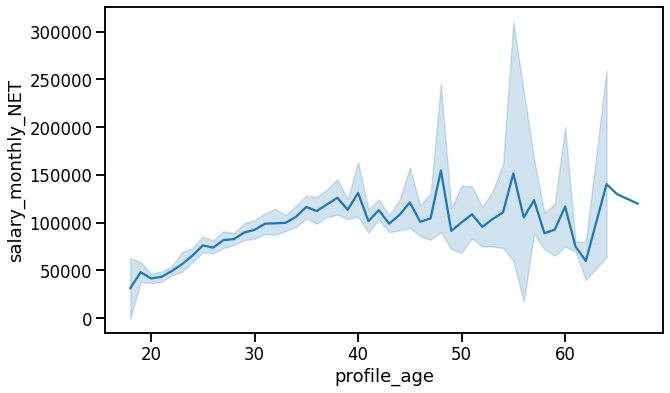

In [25]:
plt.figure(figsize=(10,6))
max_age = 100
seaborn.lineplot(data=df[df.profile_age < max_age],
                 x='profile_age', y="salary_monthly_NET",
                 estimator='mean', ci=95)

### Binarization or segmentation

In the graph above, we see that the line becomes very erratic from the age of 40. This is because very little data exists for each age from that point on.

To solve this problem, we can create age ranges of 5 years. The pandas.cut function works for this type of situation.

In [26]:
def to_categorical(column, bin_size=5, min_cut=15, max_cut=50):
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(numpy.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x + bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    print(intervals)
    return pd.cut(column, pd.IntervalIndex.from_tuples(intervals))

In [27]:
df['profile_age_segment'] = to_categorical(df.profile_age)

[(15, 20), (20, 25), (25, 30), (30, 35), (35, 40), (40, 45), (45, 50), (50, 52000)]


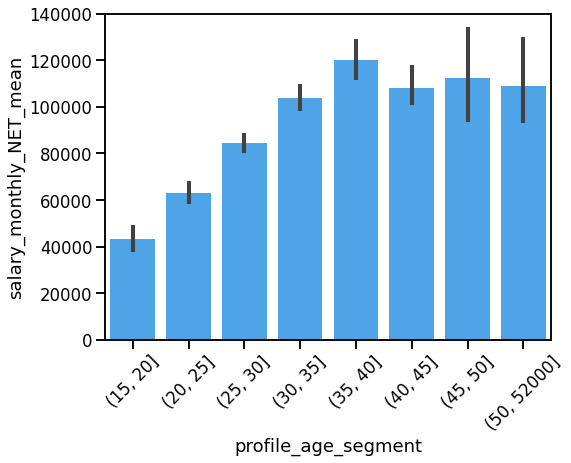

In [28]:
fig = plt.figure(figsize=(8,6))
seaborn.barplot(data=df, x='profile_age_segment', y="salary_monthly_NET",
                color=BLUE)
plt.xticks(rotation=45)
plt.ylabel("salary_monthly_NET_mean")
plt.xlabel("profile_age_segment")
plt.ticklabel_format(style='plain', axis='y')

In [32]:
df_age_segment_mean = (
    df[["profile_age_segment", "salary_monthly_NET"]]
      .groupby("profile_age_segment")
      .mean()
      .reset_index()
      .rename(columns={"salary_monthly_NET": "salary_monthly_NET_mean"})
)
df_age_segment_mean

,profile_age_segment,salary_monthly_NET_mean
0,"(15, 20]",43256.694706
1,"(20, 25]",63173.999948
2,"(25, 30]",84478.304952
3,"(30, 35]",103902.181533
4,"(35, 40]",120064.456842
5,"(40, 45]",108146.269018
6,"(45, 50]",112180.798418
7,"(50, 52000]",109109.345896


In [37]:
df_age_segment_mean["profile_age_segment_casted"] = df_age_segment_mean["profile_age_segment"].astype('str')

In [38]:
df_age_segment_mean

,profile_age_segment,salary_monthly_NET_mean,profile_age_segment_casted
0,"(15, 20]",43256.694706,"(15, 20]"
1,"(20, 25]",63173.999948,"(20, 25]"
2,"(25, 30]",84478.304952,"(25, 30]"
3,"(30, 35]",103902.181533,"(30, 35]"
4,"(35, 40]",120064.456842,"(35, 40]"
5,"(40, 45]",108146.269018,"(40, 45]"
6,"(45, 50]",112180.798418,"(45, 50]"
7,"(50, 52000]",109109.345896,"(50, 52000]"


In [39]:
fig = px.bar(df_age_segment_mean, x='profile_age_segment_casted', y='salary_monthly_NET_mean')
fig.show()

[Optional]

The graph above can also be displayed as a connected dot graph, but it is not the same as a line graph! We achieve a visually less "heavy" representation. In addition to that, we can use functions to transform the numbers corresponding to the salaries shown on each axis, called `ticks`

In [40]:
from matplotlib import ticker

# Formatter for salaries
@ticker.FuncFormatter
def k_formatter(x, pos):
    return f'{x / 1000:.0f}K'

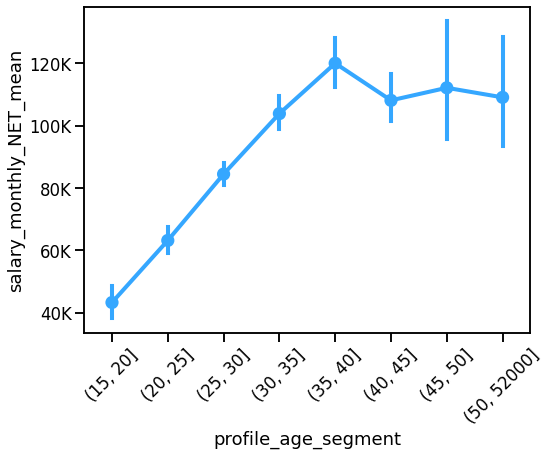

In [41]:
fig = plt.figure(figsize=(8,6))
seaborn.pointplot(data=df, x='profile_age_segment', y="salary_monthly_NET",
                  color=BLUE)
plt.xticks(rotation=45)
plt.ylabel("salary_monthly_NET_mean")
plt.xlabel("profile_age_segment")
plt.ticklabel_format(style='plain', axis='y')
fig.axes[0].yaxis.set_major_formatter(k_formatter)

## Dot plots (scatterplots)

* y-axis: continuous numeric variable
* x-axis: continuous numeric variable

It shows the relationship between 2 or 3 continuous numeric variables. Additionally, you can use the color and shape of the dots for categorical variables and the size for an extra numeric variable.

In the following graph, it is seen how, although age is a continuous variable, the scatterplot is not a visualization that allows you to find patterns in the data since the points overlap too much.

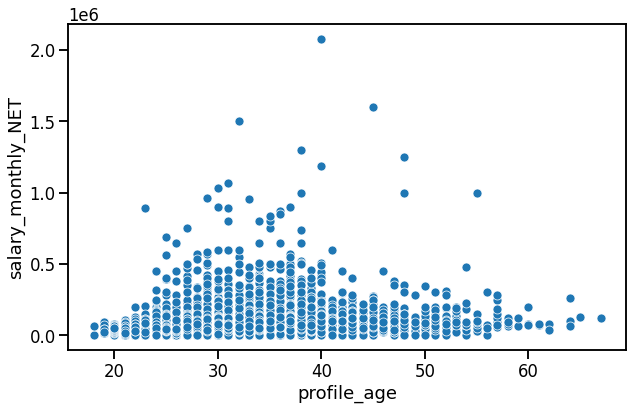

In [80]:
plt.figure(figsize=(10,6))
max_age = 100
seaborn.scatterplot(data=df[df.profile_age < max_age],
                    x='profile_age', y="salary_monthly_NET")

In [42]:
fig = px.scatter(df[df.profile_age < max_age], x="profile_age", y="salary_monthly_NET")
fig.show()

In this particular dataset, the scatterplot does not help us clarify the distributions of the variables. This happens for two reasons:
* The values accumulate in some ranges and are very sparse in others.
* There is too much data for each point to provide relevant information.

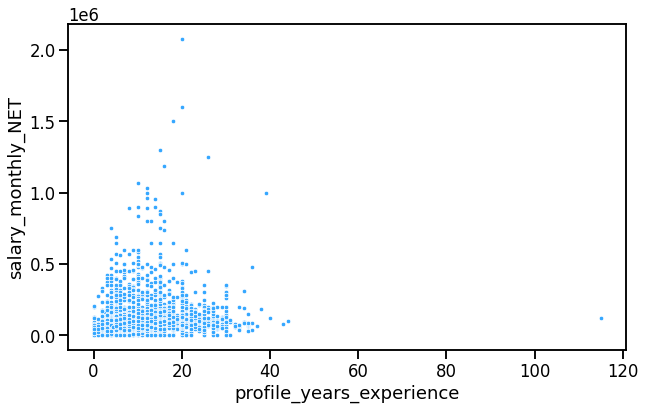

In [85]:
plt.figure(figsize=(10,6))
seaborn.scatterplot(data=df, #[(df.profile_years_experience < 20) & (df[salary_col] < 500000)],
                    x='profile_years_experience', y="salary_monthly_NET",
                    # marker=".",
                    # s=10,  # marker size
                    color=BLUE)

In [43]:
fig = px.scatter(df, x="profile_years_experience", y="salary_monthly_NET")
fig.show()

However, the power of scatterplots lies in the fact that the graphic element used (the point) has a very low visual weight, and therefore we can encode multiple variables in the same visualization.

In [86]:
df['salary_is_usd_bool'] = ~df.salary_in_usd.isna()
df.salary_is_usd_bool.value_counts()

False    5419
True      676
Name: salary_is_usd_bool, dtype: int64

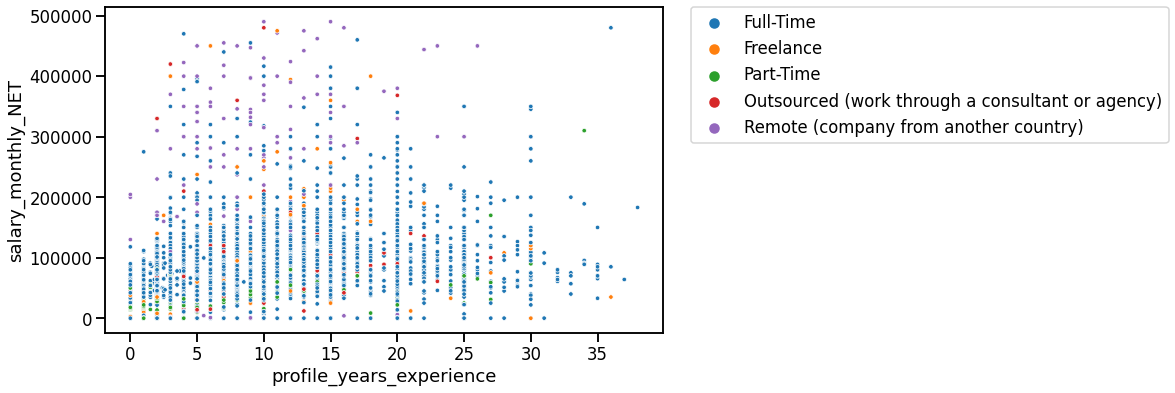

In [52]:
plt.figure(figsize=(10,6))
mask = (df['profile_years_experience'] < 40) & (df["salary_monthly_NET"] < 500000)
seaborn.scatterplot(data=df[mask], # .sample(500), 
                    x='profile_years_experience', y="salary_monthly_NET",
                    marker='.',
                    hue='work_contract_type')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [50]:
fig = px.scatter(df, x="profile_years_experience", y="salary_monthly_NET", color="work_contract_type")
fig.show()

[Optional]

To avoid overlapping points, only a sample of the data can be plotted.

For some analyses, it may be convenient that said sample is not random. For example, when we want to include all or most of the records of a subpopulation.

In [55]:
fig = px.scatter(df.sample(1000), x="profile_years_experience", y="salary_monthly_NET", color="work_contract_type")
fig.show()